In [1]:
# Get the API key from here: https://ai.google.dev/tutorials/setup
# Create a new secret called "GEMINI_API_KEY" via Add-ons -> Secrets in the top menu, and attach it to this notebook.
from kaggle_secrets import UserSecretsClient
from IPython.display import display
from IPython.display import Markdown
import os

import pathlib
import textwrap

user_secrets = UserSecretsClient()
apiKey = user_secrets.get_secret("GEMINI_API_KEY")

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [2]:
import google.generativeai as genai

genai.configure(api_key = apiKey)

In [3]:
model = genai.GenerativeModel('models/gemini-1.5-pro-latest')

### Generate text from large inputs using `gemini-1.5-pro-latest` ###

One of the biggest upgrades to Gemini 1.5 Pro is the large context window, with a maximum of 1,048,576 tokens. Below, we demonstrate an example of Gemini's ability to read a large input and answer a prompt about a very specific part (needle-in-a-haystack).

Reading the BBC News Summary dataset, we concatenate all the business articles (around 510 of them).

In [4]:
directory = "/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/business/"

newsarticles = ""

for filename in os.listdir(directory):
    file = open(f'{directory}{filename}', "r")
    newsarticles = f'{newsarticles}\n{file.read()}'


Create a prompt telling Gemini to read the news articles and answer a question about information in a specific one.

In [5]:
prompt = f'Read the following compilation of BBC news articles: {newsarticles}. Now tell me how much UK Coal had in losses in 2004.'

Call Gemini using `generate_content`. You can verify the accuracy of the response by going to `/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/business/042.txt`.

In [6]:
response = model.generate_content(prompt)
to_markdown(response.text)

> UK Coal had losses of £51.6 million in 2004. 


Upon counting the number of tokens in the prompt, you can see that Gemini was able to accurately find what you needed from a very large context window.

In [7]:
model.count_tokens(prompt)

total_tokens: 222618

## Generate text from image and text prompts using `gemini-1.5-pro-latest`

In [ ]:
!curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg

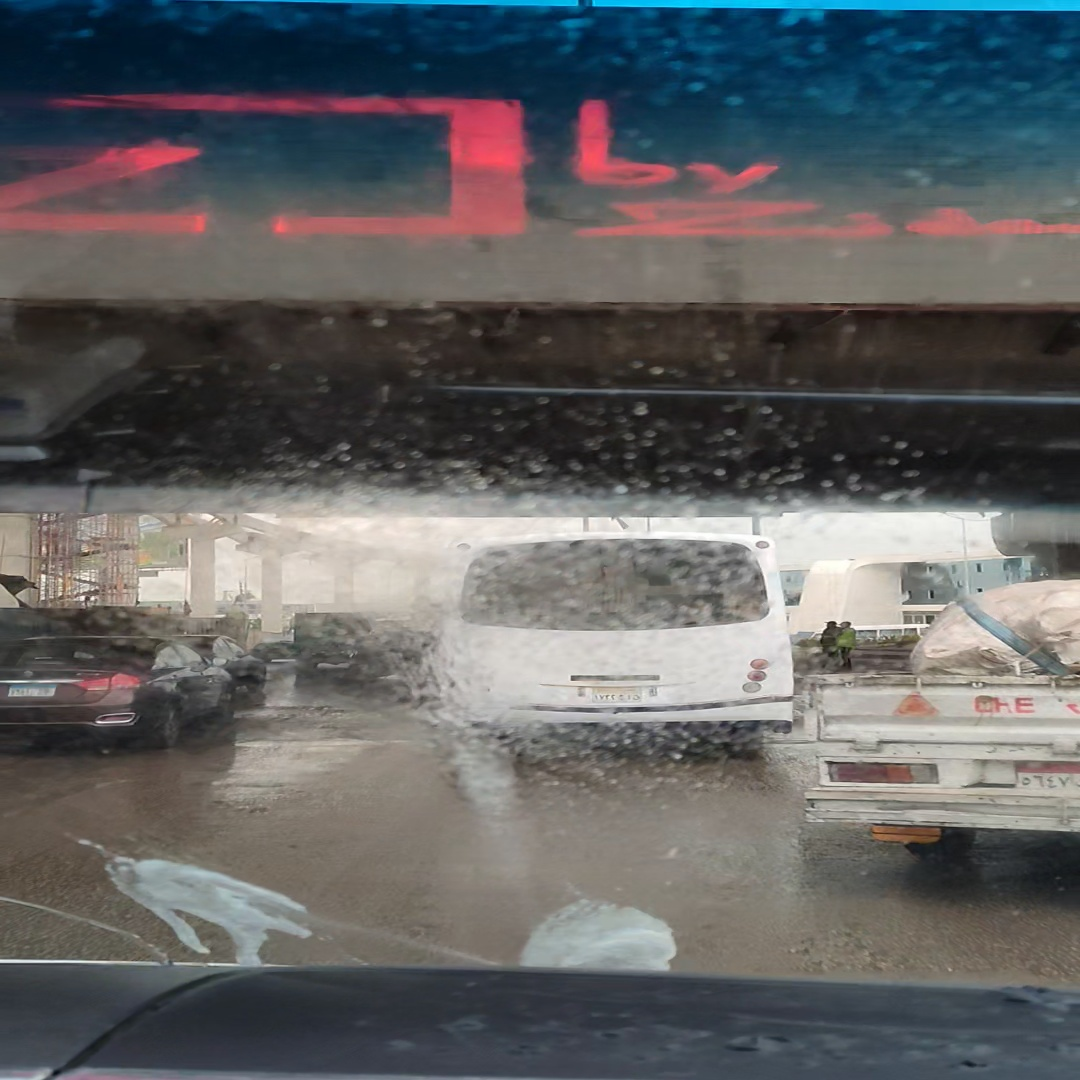

In [8]:
import PIL.Image

img = PIL.Image.open('/kaggle/input/ttttttttttttttttttt/WhatsApp Image 2024-05-04 at 2.36.41 PM.jpeg')
img

In [9]:
import time

start = time.time()
response = model.generate_content(["""Input Prompt: 
Capture the driving scene in front of you using the following information from the front camera:
Camera ID: front_camera_1
Resolution: 1920x1080
Frame Rate: 30 fps
Objects:
- Type: car, Coordinates: (313.3862, 790.7543945), Distance: 4.81 meters
- Type: bus, Coordinates: (93.21683502, 665.3580322), Distance: 21.46 meters
- Type: car, Coordinates: (851.9764404, 662.2312012), Distance: 31.25 meters
- Type: car, Coordinates: (486.8249512, 681.1190186), Distance: 12.95 meters
- Type: car, Coordinates: (655.0286865, 647.2046509), Distance: 14.56 meters

* Enhance this description by including factors that would affect decision-making in a driving scenario, considering the locations and closeness of cars according to the provided distances.
* Just give a description without headers or headlines.
""", img])

end = time.time()

print("time",end-start)
to_markdown(response.text)

time 3.7845587730407715


> A white bus, just 21.46 meters ahead, dominates the view. Raindrops splatter on the windshield, potentially hindering visibility.  A car is very close in front, just 4.81 meters away, demanding caution and likely indicating stopped or very slow traffic.  Further down the road, at 31.25 meters, another car is visible, suggesting a line of vehicles. Two more cars, 12.95 and 14.56 meters ahead respectively, reinforce the presence of moderate traffic. The wet road surface demands careful maneuvering, as braking distances are likely increased. 
